In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
from datetime import datetime
import time

# 행 많이보기
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

# 한글 폰트 설정
fm.get_fontconfig_fonts()

# fname 옵션을 사용하는 방법
font_location = 'C:\\WINDOWS\\Fonts\\\x7f\x7f\x7f\x7f.TTF' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)
plt.rc('font', size=12)
plt.figure(figsize=(20,10))

plt.rcParams["figure.figsize"] = (14,4)
# 지수 표현 안보기

<Figure size 1440x720 with 0 Axes>

In [2]:
import pandas as pd

# kosdaq
단순히 kosdaq으로 그래프 그려봄

In [3]:
sipal=['18.01','18.02','18.03','18.04','18.05','18.06','18.07','18.08','18.09','18.10','18.11','18.12']
uniqName=['19.01','19.02','19.03','19.04','19.05','19.06','19.07','19.08','19.09','19.10','19.11','19.12','20.01','20.02','20.03','20.04','20.05','20.06','20.07']

In [4]:
kosdaq=pd.DataFrame()
for i in sipal:
    d=pd.read_excel('./Data/'+i+'.xls')
    kosdaq=pd.concat([kosdaq,d.iloc[0,:]],axis=1)

for i in uniqName:
    d=pd.read_excel('./Data/'+i+'.xls',index_col='지수명')
    kosdaq=pd.concat([kosdaq,d.loc['코스닥지수',:]],axis=1)

In [5]:
#나중에 써먹어야지
지수명=d.index.tolist()
#지수명

In [7]:
# column이름을 해당 월로 변경
kosdaq.columns=sipal+uniqName

In [8]:
kosdaq=kosdaq.transpose()

In [16]:
kosdaq.drop('지수명',axis=1,inplace=True)

#kosdaq150

In [17]:
# type을 숫자형태로 변환하기 위한 작업

거래량=kosdaq['거래량(주)'].tolist()
거래대금=kosdaq['거래대금(원)'].tolist()
for i in range(len(kosdaq)):
    거래량[i]=거래량[i].replace(',','')
    거래대금[i]=거래대금[i].replace(',','')
kosdaq['거래량(주)']=거래량
kosdaq['거래대금(원)']=거래대금

kosdaq=kosdaq.astype(float)

[달러 환율](https://finance.naver.com/marketindex/exchangeDetail.nhn?marketindexCd=FX_USDKRW#)

C:\Users\user\anaconda3\envs\pytest\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\pytest\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


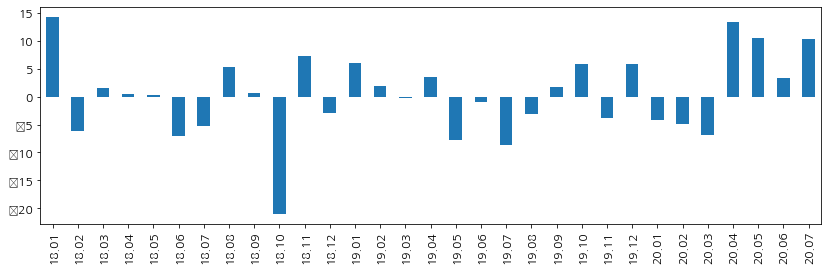

In [18]:
# 12월말: 트럼프 탄핵 
# 1월 초: 이란 공습_미 달러가 급 오르는 순간이 있었음.
    # 기억하는 이유-> 대만 여행 가려고 환전한 다음에 환율 급 오름.
# 1월 20일: 우한폐렴->코로나

kosdaq['등락률(%)'].plot(kind='bar')

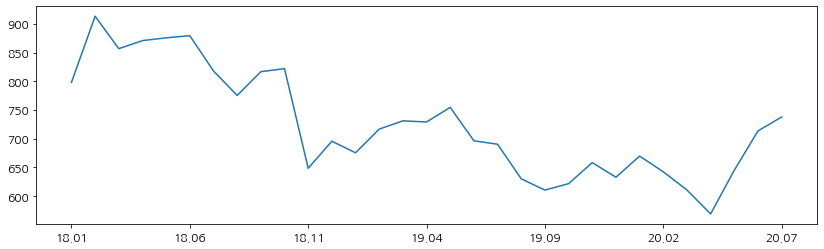

In [19]:
kosdaq['시작일기준가'].plot()

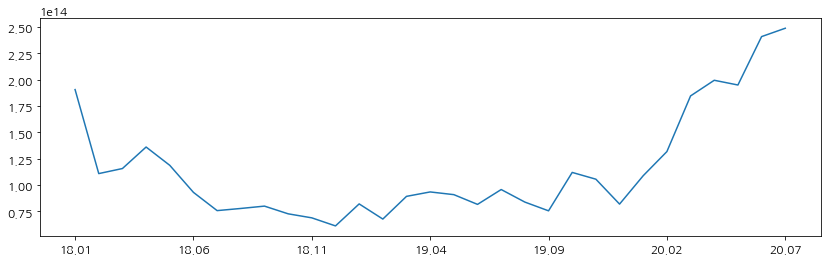

In [20]:
kosdaq['거래대금(원)'].plot()

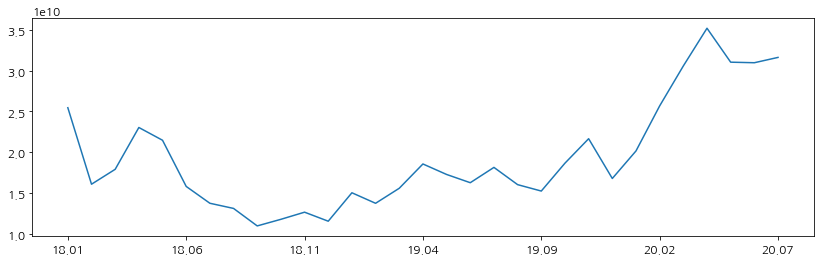

In [21]:
kosdaq['거래량(주)'].plot()

In [22]:
kosdaq['거래대금/거래량']=kosdaq['거래대금(원)']/kosdaq['거래량(주)']

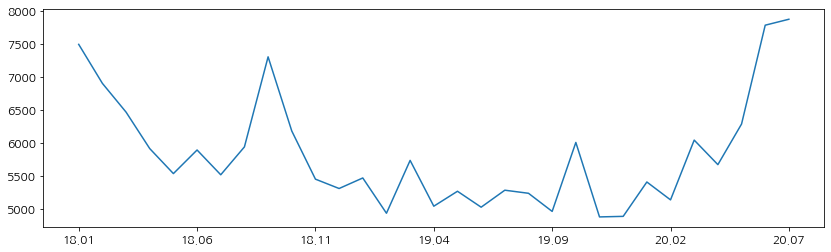

In [23]:
kosdaq['거래대금/거래량'].plot()

## (Excel)kosdaq

kosdaq.to_excel('./Data/kosdaq(19.01~20.07).xlsx',index_label='id')

## (Excel)종목별

COVID_19=['제조','제약','의료·정밀기기']

for j in COVID_19:
    temp=pd.DataFrame()
    path='./Data/'+j+'.xlsx'
    for i in uniqName:
        d=pd.read_excel('./Data/'+i+'.xls',index_col='지수명')
        temp=pd.concat([temp,d.loc[j,:]],axis=1)
    temp.columns=uniqName
    temp=temp.transpose()
    temp.to_excel(path,index_label='id')

life=['음식료·담배','섬유·의류','종이·목재','출판·매체복제','화학','비금속','금속',
 '기계·장비','일반전기전자','운송장비·부품','기타 제조','건설','유통',
 '운송','금융','오락,문화','기타서비스','코스닥 IT','통신방송서비스', '통신서비스',
 '방송서비스', 'IT S/W & SVC','인터넷','디지털컨텐츠', '소프트웨어',
 '컴퓨터서비스', 'IT H/W', '통신장비', '정보기기','반도체', 'IT부품']

# 종목별: 제조, 제약, 의료_정밀기기
코로나와 직접적으로 영향이 있을 것 같은 종목만 뽑아서 그래프 그려봄

제조=pd.read_excel('./Data/제조.xlsx',index_col='id')
제약=pd.read_excel('./Data/제약.xlsx',index_col='id')
의료_정밀기기=pd.read_excel('./Data/의료·정밀기기.xlsx',index_col='id')

# type을 숫자형태로 변환하기 위한 작업
시작일기준가=제조['시작일기준가'].tolist()
종료일종가=제조['종료일종가'].tolist()
거래량=제조['거래량(주)'].tolist()
거래대금=제조['거래대금(원)'].tolist()

for i in range(len(kosdaq)):
    시작일기준가[i]=시작일기준가[i].replace(',','')
    종료일종가[i]=종료일종가[i].replace(',','')
    거래량[i]=거래량[i].replace(',','')
    거래대금[i]=거래대금[i].replace(',','')
제조['시작일기준가']=시작일기준가
제조['종료일종가']=종료일종가
제조['거래량(주)']=거래량
제조['거래대금(원)']=거래대금

제조=제조.astype(float)

# type을 숫자형태로 변환하기 위한 작업
시작일기준가=제약['시작일기준가'].tolist()
종료일종가=제약['종료일종가'].tolist()
대비=제약['대비'].tolist()
거래량=제약['거래량(주)'].tolist()
거래대금=제약['거래대금(원)'].tolist()

for i in range(len(kosdaq)):
    시작일기준가[i]=시작일기준가[i].replace(',','')
    종료일종가[i]=종료일종가[i].replace(',','')
    대비[i]=대비[i].replace(',','')
    거래량[i]=거래량[i].replace(',','')
    거래대금[i]=거래대금[i].replace(',','')
제약['시작일기준가']=시작일기준가
제약['종료일종가']=종료일종가
제약['대비']=대비
제약['거래량(주)']=거래량
제약['거래대금(원)']=거래대금

제약=제약.astype(float)

# type을 숫자형태로 변환하기 위한 작업
시작일기준가=의료_정밀기기['시작일기준가'].tolist()
종료일종가=의료_정밀기기['종료일종가'].tolist()
#대비=의료_정밀기기['대비'].tolist()
거래량=의료_정밀기기['거래량(주)'].tolist()
거래대금=의료_정밀기기['거래대금(원)'].tolist()

for i in range(len(kosdaq)):
    시작일기준가[i]=시작일기준가[i].replace(',','')
    종료일종가[i]=종료일종가[i].replace(',','')
    #대비[i]=대비[i].replace(',','')
    거래량[i]=거래량[i].replace(',','')
    거래대금[i]=거래대금[i].replace(',','')
의료_정밀기기['시작일기준가']=시작일기준가
의료_정밀기기['종료일종가']=종료일종가
의료_정밀기기['대비']=대비
의료_정밀기기['거래량(주)']=거래량
의료_정밀기기['거래대금(원)']=거래대금

의료_정밀기기=의료_정밀기기.astype(float)

f,axes=plt.subplots(1,3,figsize=(15,3))

의료_정밀기기['시작일기준가'].plot(ax=axes[0])
제약['시작일기준가'].plot(ax=axes[1])
제조['시작일기준가'].plot(ax=axes[2])
#'제조':'IT부품'

# 코로나 59개 테마종목
1. 이 테마 종목들이 해당하는 종목을 그래프 그려보려고 했으나 정부가 감시(?)하고 있는 테마 종목이 무엇인지 못찾음

# 내 생각
1. kosdaq 사용

복합적. 월별로 kosdaq사용가능

트럼프때문에 구매를 안,,,하지는 않을 거 같음.

소비 물가 지수(?)와 같은 한 번더 가공된 통계적 자료 사용해서 코로나로 인한 영향이 더 직접적이지 않을까

2. 종목별 kosdaq사용

코로나로 인해 소비자가 소비하는(선호) 상품군의 순위가 달라짐.(근거: [통계청|코로나_온라인쇼핑동향](http://kostat.go.kr/portal/korea/covid-19/statistics_onlineshopping.jsp))

온라인쇼핑, 홈쇼핑 모두 비대면 쇼핑이라는 점에서 참고할 만한 근거라고 생각.